In [2]:
import pandas as pd
import numpy as np

from sklearn.ensemble import IsolationForest
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings(action='ignore')
## Data Load
train_df = pd.read_csv('./Data/train.csv') # Train
train_df.head()
val_df = pd.read_csv('./Data/val.csv') # Validation
val_df.head()

val_normal, val_fraud = val_df['Class'].value_counts()
val_contamination = val_fraud / val_normal
train_x = train_df.drop(columns=['ID']) # Input Data
def get_pred_label(model_pred):
    model_pred = np.where(model_pred == 1, 0, model_pred)
    model_pred = np.where(model_pred == -1, 1, model_pred)
    return model_pred
val_x = val_df.drop(columns=['ID', 'Class']) # Input Data
val_y = val_df['Class'] # Label



In [4]:
import numpy as np
from numpy import ma
import pandas as pd
import math
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as colors
%matplotlib inline
from matplotlib import ticker, cm
from matplotlib.pyplot import figure
import seaborn as sns

from scipy.stats import multivariate_normal
from sklearn.metrics import f1_score, confusion_matrix, classification_report, precision_recall_fscore_support
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import LocalOutlierFactor
from sklearn.ensemble import IsolationForest
from sklearn.covariance import EllipticEnvelope
from sklearn.svm import OneClassSVM

from keras.models import Model, load_model
from keras.layers import Input, Dense
from keras.callbacks import ModelCheckpoint, TensorBoard
from keras import regularizers

Using TensorFlow backend.


In [4]:
dfRaw = pd.read_csv('./Data/train.csv')
print(dfRaw.shape)
print(dfRaw.columns)

(113842, 31)
Index(['ID', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29', 'V30'],
      dtype='object')


In [8]:
val_x2 = val_x[:]
val_x2.drop(['V29','V28'],axis=1,inplace=True)
# val_x2.drop(['V29','V28','V19','V13','V15'],axis=1,inplace=True)

In [13]:
colnames = list(val_df.columns)[1:31]


In [16]:
col3set = []
for col1 in colnames:
    for col2 in colnames:
        for col3 in colnames:
            if([col1,col2,col3] )

In [18]:
delcols = []
count = []
f1s = []

for col in colnames:
    for col2 in colnames:
        temp_list = [col,col2]
        val_x2 = val_x.drop(columns=temp_list,axis=1)
        cov = EllipticEnvelope(support_fraction = 0.994, contamination =0.001)
        ground_truth = np.ones(len(val_x2), dtype=int)

        y_pred = cov.fit_predict(val_x2)
        n_errors = (y_pred != ground_truth).sum()
        n_errors

        y_predLOF = y_pred.copy()
        y_predDF = pd.DataFrame(y_predLOF)
        y_predDF[y_predDF[0] == 1] = 0
        y_predDF[y_predDF[0] == -1] = 1

        y_predLOF = y_predDF.values
        y_predLOF = np.ravel(y_predLOF)

        precision,recall,fbeta_score, support  = precision_recall_fscore_support(val_y, y_predLOF, average='binary') 

        print("precision ", round((precision), 4) ,"recall ", round((recall), 4))
        print("drop colnames",temp_list, "F1 score on Test", round((fbeta_score), 4) )
        
        
        delcols.append(temp_list)
        f1s.append(round((fbeta_score), 4))
        
        # count.append(i*0.00001)

print(max(f1s))

precision  0.7586 recall  0.7333
drop colnames ['V1', 'V1'] F1 score on Test 0.7458
precision  0.4828 recall  0.4667
drop colnames ['V1', 'V2'] F1 score on Test 0.4746
precision  0.1724 recall  0.1667
drop colnames ['V1', 'V3'] F1 score on Test 0.1695
precision  0.3448 recall  0.3333
drop colnames ['V1', 'V4'] F1 score on Test 0.339
precision  0.6897 recall  0.6667
drop colnames ['V1', 'V5'] F1 score on Test 0.678
precision  0.4138 recall  0.4
drop colnames ['V1', 'V6'] F1 score on Test 0.4068
precision  0.4828 recall  0.4667
drop colnames ['V1', 'V7'] F1 score on Test 0.4746
precision  0.7586 recall  0.7333
drop colnames ['V1', 'V8'] F1 score on Test 0.7458
precision  0.4138 recall  0.4
drop colnames ['V1', 'V9'] F1 score on Test 0.4068
precision  0.3448 recall  0.3333
drop colnames ['V1', 'V10'] F1 score on Test 0.339
precision  0.1724 recall  0.1667
drop colnames ['V1', 'V11'] F1 score on Test 0.1695
precision  0.1724 recall  0.1667
drop colnames ['V1', 'V12'] F1 score on Test 0.169

KeyboardInterrupt: 

In [22]:
df = pd.DataFrame({'delcols':delcols,'f1_score':f1s})
df.head()

,delcols,f1_score
0,"[V1, V1]",0.7458
1,"[V1, V2]",0.4746
2,"[V1, V3]",0.1695
3,"[V1, V4]",0.3390
4,"[V1, V5]",0.6780


In [26]:
df['delcol1'] = df.delcols.str[0]
df['delcol2'] = df.delcols.str[1]

In [32]:


df2 =df.groupby('delcol1').mean()
df2.sort_values('f1_score',inplace=True,ascending=False)
df2

,f1_score
delcol1,
V8,0.667830
V6,0.557090
V2,0.548050
V1,0.473470
V7,0.472340
V5,0.449740
V9,0.381940
V3,0.350300
V10,0.325440


In [33]:
df3 =df.groupby('delcol2').mean()
df3.sort_values('f1_score',inplace=True,ascending=False)
df3

,f1_score
delcol2,
V21,0.674918
V22,0.644100
V8,0.601725
V13,0.576300
V30,0.576300
V24,0.536236
V26,0.530073
V20,0.530073
V15,0.525450


In [34]:

temp_list = ['V21','V22','V8']
val_x2 = val_x.drop(columns=temp_list,axis=1)
cov = EllipticEnvelope(support_fraction = 0.994, contamination =0.001)
ground_truth = np.ones(len(val_x2), dtype=int)

y_pred = cov.fit_predict(val_x2)
n_errors = (y_pred != ground_truth).sum()
n_errors

y_predLOF = y_pred.copy()
y_predDF = pd.DataFrame(y_predLOF)
y_predDF[y_predDF[0] == 1] = 0
y_predDF[y_predDF[0] == -1] = 1

y_predLOF = y_predDF.values
y_predLOF = np.ravel(y_predLOF)

precision,recall,fbeta_score, support  = precision_recall_fscore_support(val_y, y_predLOF, average='binary') 

print("precision ", round((precision), 4) ,"recall ", round((recall), 4))
print("drop colnames",temp_list, "F1 score on Test", round((fbeta_score), 4) )

precision  0.8621 recall  0.8333
drop colnames ['V21', 'V22', 'V8'] F1 score on Test 0.8475


In [ ]:
df2

In [ ]:
test_df = pd.read_csv('./Data/test.csv') # Train
test_df.head()
test_x = test_df.drop(columns=['ID'])

cov = EllipticEnvelope(support_fraction = 0.994, contamination = 0.001)
ground_truth = np.ones(len(test_x), dtype=int)

y_pred = cov.fit_predict(test_x)

y_predLOF = y_pred.copy()
y_predDF = pd.DataFrame(y_predLOF)
y_predDF[y_predDF[0] == 1] = 0
y_predDF[y_predDF[0] == -1] = 1

## Submission
submit = pd.read_csv('./Data/sample_submission.csv')
submit.head()
submit['Class'] = y_predDF
submit.to_csv('./submit.csv', index=False)

In [64]:
count

[0.005,
 0.006,
 0.007,
 0.008,
 0.009000000000000001,
 0.01,
 0.011,
 0.012,
 0.013000000000000001,
 0.014]

In [68]:
f1s

0.8475

In [58]:
for i in range(970,997,3):
    print(i*0.001)

0.97
0.973
0.976
0.979
0.982
0.985
0.988
0.991
0.994


In [63]:
cov = EllipticEnvelope(support_fraction = 0.994, contamination = 0.001)
ground_truth = np.ones(len(val_x), dtype=int)

y_pred = cov.fit_predict(val_x)
n_errors = (y_pred != ground_truth).sum()
n_errors

y_predLOF = y_pred.copy()
y_predDF = pd.DataFrame(y_predLOF)
y_predDF[y_predDF[0] == 1] = 0
y_predDF[y_predDF[0] == -1] = 1

y_predLOF = y_predDF.values
y_predLOF = np.ravel(y_predLOF)

precision,recall,fbeta_score, support  = precision_recall_fscore_support(val_y, y_predLOF, average='binary')

print("precision ", round((precision), 4))
print("recall ", round((recall), 4))
print("F1 score on Test", round((fbeta_score), 4))



precision  0.8621
recall  0.8333
F1 score on Test 0.8475


In [17]:
val_y

0        0
1        0
2        0
3        0
4        0
        ..
28457    0
28458    0
28459    0
28460    0
28461    0
Name: Class, Length: 28462, dtype: int64

In [18]:
val_xy = val_x.copy()

val_xy['Class'] = val_y

In [19]:
import seaborn as sns

<AxesSubplot:xlabel='Class', ylabel='V17'>

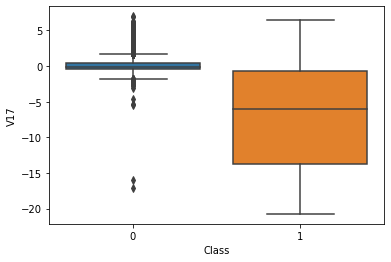

In [20]:
sns.boxplot(x = 'Class', y='V17',data = val_xy)

In [29]:
val_x.V1[2]

1.14552438734553

In [35]:
val_x[(val_x.V1 == -0.33826175242575 )|(val_x.V1 == 1.14552438734553)]

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30
0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,-0.366846,...,-0.246914,-0.633753,-0.120794,-0.38505,-0.069733,0.094199,0.246219,0.083076,-0.255991,-0.994878
2,1.145524,0.575068,0.194008,2.598192,-0.092210,-1.044430,0.531588,-0.241888,-0.896287,0.757952,...,0.011106,-0.119703,-0.076510,0.69132,0.633984,0.048741,-0.053192,0.016251,0.169496,-0.994502
